In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Matplotlib is building the font cache; this may take a moment.


In [2]:
try:
    df = pd.read_csv("predictions_tracker2.csv")
    print("Loaded existing tracker file.")
except FileNotFoundError:
    df = pd.DataFrame(columns=[
        "Date", "League", "Match", "Your_Pick", "Result",
        "Odds", "Outcome", "Profit", "EV"
    ])
    print("New tracker created.")

Loaded existing tracker file.


In [3]:
def add_prediction(date, league, match, your_pick, result, odds, outcome, win_prob):
    """
    date: 'YYYY-MM-DD'
    league: 'Premier League', etc.
    match: 'Arsenal vs Chelsea'
    your_pick: 'Arsenal to Win'
    result: final score, e.g., '2-1'
    odds: decimal odds (e.g., 1.85)
    outcome: 'win', 'lose', or 'push'
    win_prob: your estimated probability (0.0 - 1.0)
    """

    # Calculate profit (assuming ₦100 stake)
    if outcome.lower() == "win":
        profit = (odds - 1) * 100
    elif outcome.lower() == "lose":
        profit = -100
    else:
        profit = 0  # push or refund

    # Calculate Expected Value (EV)
    ev = (win_prob * (odds - 1) * 100) - ((1 - win_prob) * 100)

    new_row = {
        "Date": date,
        "League": league,
        "Match": match,
        "Your_Pick": your_pick,
        "Result": result,
        "Odds": odds,
        "Outcome": outcome,
        "Profit": profit,
        "EV": ev
    }

    global df
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    df.to_csv("predictions_tracker.csv", index=False)
    print(f"✅ Added: {match} ({outcome.upper()}) | Profit: ₦{profit:.2f} | EV: ₦{ev:.2f}")

In [4]:
add_prediction("2025-10-18", "Serie A", "Torino vs Napoli", "Napoli to Win", "1-2", 1.70, "win", 0.65)
add_prediction("2025-10-18", "La Liga", "Barcelona vs Girona", "BTTS Yes", "2-1", 1.80, "win", 0.60)
add_prediction("2025-10-19", "EPL", "Liverpool vs Brentford", "Over 2.5", "1-1", 1.85, "lose", 0.55)

✅ Added: Torino vs Napoli (WIN) | Profit: ₦70.00 | EV: ₦10.50
✅ Added: Barcelona vs Girona (WIN) | Profit: ₦80.00 | EV: ₦8.00
✅ Added: Liverpool vs Brentford (LOSE) | Profit: ₦-100.00 | EV: ₦1.75


C:\Users\USER\AppData\Local\Temp\ipykernel_11056\68110417.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


In [5]:
def summary():
    if df.empty:
        print("No data yet.")
        return

    total_bets = len(df)
    wins = len(df[df["Outcome"].str.lower() == "win"])
    losses = len(df[df["Outcome"].str.lower() == "lose"])
    pushes = len(df[df["Outcome"].str.lower() == "push"])
    total_profit = df["Profit"].sum()
    avg_ev = df["EV"].mean()
    win_rate = (wins / total_bets) * 100
    roi = (total_profit / (total_bets * 100)) * 100

    print("\n📊 --- Betting Tracker Summary ---")
    print(f"Total Bets: {total_bets}")
    print(f"Wins: {wins} | Losses: {losses} | Pushes: {pushes}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Total Profit: ₦{total_profit:.2f}")
    print(f"ROI: {roi:.2f}%")
    print(f"Average EV: ₦{avg_ev:.2f}")
    print(f"Predicted Accuracy vs. Real: {'✅ On Track' if avg_ev > 0 else '⚠️ Check Selections'}")

In [6]:
def plot_performance():
    if df.empty:
        print("No data to plot yet.")
        return

    df_sorted = df.sort_values("Date")
    df_sorted["Cumulative_Profit"] = df_sorted["Profit"].cumsum()

    plt.figure(figsize=(10, 5))
    plt.plot(df_sorted["Date"], df_sorted["Cumulative_Profit"], marker="o", linewidth=2)
    plt.title("📈 Betting Performance Over Time")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Profit (₦)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

In [7]:
summary()


📊 --- Betting Tracker Summary ---
Total Bets: 3
Wins: 2 | Losses: 1 | Pushes: 0
Win Rate: 66.67%
Total Profit: ₦50.00
ROI: 16.67%
Average EV: ₦6.75
Predicted Accuracy vs. Real: ✅ On Track


C:\Users\USER\AppData\Local\Temp\ipykernel_11056\4225062213.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


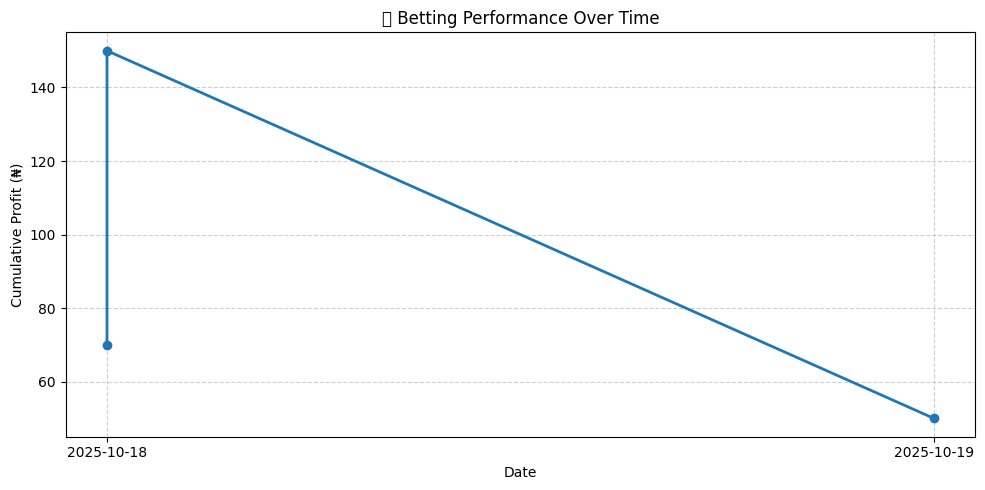

In [8]:
plot_performance()